# COGS 118B - Final Project

# EEG Sleep Stage Exploration

## Group members

Antara Sengupta 

Dhathry Doppalapudi 

Abhinav Chandra 

Austin Calza 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from umap import UMAP

# Abstract 

Our objective is to employ unsupervised machine learning techniques to cluster EEG signal data into distinct sleep stages. The dataset comprises EEG signals from different brain lobes, representing various frequency subbands associated with sleep stages. The unsupervised approach involves clustering similar patterns without predefined labels, allowing the model to identify inherent structures in the data. By utilizing techniques like hierarchical, k-means, or GMM clustering, we aim to group EEG signals into clusters corresponding to different sleep stages. We will do model selection to figure out which clustering model to pursue. Success will be evaluated based on the coherence and meaningfulness of the identified clusters, providing insights into the potential unsupervised categorization of sleep stages in the dataset.

# Background

The exploration of neurological data through the utilization of machine learning algorithms is a booming field with various research initiatives tackling it. Machine learning methods allow us to sift through billions of neurobiological connections and uncover correlations and build tools that can be utilized in health care, pharmaceuticals, and technology development. The study of sleep stages has witnessed significant advancements in the biotechnology and machine learning worlds, driven by the importance of this process in diagnosing and treating sleep disorders and also learning more about this essential process of human life. 

Sleep staging is the process of categorizing and classifying the different stages of sleep based on physiological parameters, and the one we are focusing on in this project is brain waves. The two main types of sleep are REM (rapid eye movement) sleep and non-REM sleep, which further includes three sub-stages: N1 ( transition from wakefulness to sleep), N2 (slightly deeper sleep), and N3 (slow-wave sleep or deep sleep). Utilizing unsupervised machine learning methods for sleep staging has become more prevalent, and research focuses on this phenomenon have sparked curiosity within us to pursue our project within this realm.

Traditional sleep staging with EEG signals would require intensive manual intervention from a sleep specialist, but machine learning has made this classification task much simpler [\[1\]](https://www.sciencedirect.com/science/article/abs/pii/S0957417421011337). Utilizing machine learning to perform sleep staging has made this task much more broadly applicable and further accessible, which is crucial in furthering sleep research and studies. This is important because sleep studies are used to diagnose disorders such as epilepsy and sleep apnea, while also a helpful metric in understanding human health, cognition, and further emotional aspects and information concerning the human mind. There has been research done with hierarchical classification models [\[1\]](https://www.sciencedirect.com/science/article/abs/pii/S0957417421011337) to do sleep staging tasks, along with unsupervised multi-sub epoch feature learning. The EEG epoch is divided into sub epochs, mapped to amplitude and time axes, and statistical classification features are extracted. Unsupervised feature learning is conducted for consistent and specific classification features. A hierarchical weighted support vector machine-based classification model is established, addressing class imbalance in sleep stages. The proposed method demonstrates improved sleep staging performance, contributing to the development of EEG-based sleep staging systems. The study aims to enhance real-time monitoring, reduce medical staff workload, and advance the smart health industry.

Another initiative to simplify the time-consuming task of manual sleep staging through unsupervised machine learning is by the usage of deep belief nets (DBNs), which is a feature learning architecture that can be applied to EEG sleep data[\[2\]](https://www.hindawi.com/journals/aans/2012/107046/). Learned features for raw-DBN include low and high frequency features for EEG and high and low amplitude features for EMG.  The study also explores anomaly detection on home sleep data using RMSE between actual and reconstructed signals. The work demonstrates the feasibility of applying automatic sleep staging to multimodal sleep data without handmade features, emphasizing the advantages of unsupervised feature learning.

There are supervised machine learning efforts as well to perform automated sleep staging, such as through the utilization of backward feature selection to find the optimal feature combination that creates the highest sleep stage classification accuracy[\[3\]](https://sciresol.s3.us-east-2.amazonaws.com/IJST/Articles/2016/Issue-25/Article53.pdf). The method used in this study specifically was Sequential Backward Feature Selection (SBFS), which allowed them to pinpoint the combination of features that creates the most robust classifier. By correctly classifying transition epochs between sleep stages, these researchers utilized time-domain features of EEG signals with an ANN classifier, and ultimately designed five classifiers predicting awake, N1, N2, N3, and REM sleep stages. This highlights the benefits integrating frequency-domain and other statistical analysis techniques when approaching neurobiological/electrophysiological data. 

Another avenue of exploration involves the utilization of wavelet transform and artificial neural network (ANN) procedures for sleep staging, aiming to automate this time-consuming and subjective manual process[\[4\]](https://www.sciencedirect.com/science/article/abs/pii/S0925231216303289). These neural networks are applied to classify sleep spindles, REM, and awake. This study emphasizes the importance of feature engineering and feature extraction methods, along with an automatic sleep scoring system called CVNF+CVANN. This is a new hybrid ML method which combines complex-valued nonlinear features (CVNF) and complex-valued neural network (CVANN), and uses this hybrid algorithm to perform sleep scoring using EEG data from a single channel.

These prior works underscore the ongoing efforts to streamline and enhance the sleep staging process. However, there are various limitations, such as the imperfections of many of these unsupervised ML algorithms when working with complex biological data. There have also been very few initiatives to address the specific characteristics of each stage of sleep in machine learning classification algorithms, specifically N1, N2, and N3. There has been a heavy focus within a lot of initiatives in prioritizing the study of just REM and awake sleep, but there are some efforts starting to be made to focus on all stages [\[3\]](https://sciresol.s3.us-east-2.amazonaws.com/IJST/Articles/2016/Issue-25/Article53.pdf). This is crucial work because sleep is essential for humans to survive and thrive, as it determines our ability to function, think, feel, perform, and also is detrimental to our overall well-being and smooth functioning of bodily processes and immune systems. Sleep staging is a crucial task that has been done by experts for a long time, but can now be simplified through automated processes, due to machine learning. With our project, we aim to continue this fascinating exploration, and contribute to this blossoming initiative to use data science and machine learning to further gain insight into the human brain. 

# Problem Statement

Studying the sleeping patterns of humans has revealed that sleep can be divided into several stages, and each of these stages is categorized by different activity in the brain. The stages of wake, N1, N2, N3, and REM sleep all have different characteristics in terms of the levels of delta, alpha, theta, gamma, and beta waves. Because subjects in similar stages of sleep should have similar activity in the brain, and unsupervised machine learning methods could be used to cluster similar EEG observations, and hence, group the different stages of sleep together. Hence, since brain activity can be observed with EEG data, this project will look to take the observed EEG data of subjects in different stages of sleep and build a model that can cluster these data points into groups that reflect different stages of sleep.

# Data

The data can be found at https://www.kaggle.com/datasets/rafsanjany44/rem-and-nrem-sleep-classification. This data comes from a Dutch sleep center Haaglanden Medisch Centrun, and it consists of a series of EEG observations of individuals in different stages of sleep. The dataset consists of 75 variables and around 89,100 observations. With over a 1000 times as many observations as variables, the data should be well suited to create a solution that generalizes well. Each observation consists of different measurements of alpha, beta, gamma, theta, and delta waves, such as the mean, median, peak value, and spectral edge of each of these wave measures. There are three sets of each of these measurements from three different parts of the brain: F4 in the frontal lobe, C4 in the central lobe, and O2 in the occipital lobe. No individual variable should hold more weight than another, considering that prior to the investigation, it is unclear if a particular type of brain wave or brain area is more important. Each of these variables are on different scales, and to ensure no one variable has a stronger influence on the model, each variable will be normalized.


In [5]:
#loading in dataset
sleep_data = pd.read_csv('REM_NREM.csv')
sleep_data

,Sleep_Stage,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,Spectral Edge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,Spectral Edge_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,Spectral Edge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,Spectral Edge_Gamma_O2,PeakF_Gamma_O2
0,NREM,0.00034,10.11512,17.85756,17.48293,10.24000,0.00047,17.73268,25.35024,27.47317,...,0.00112,0.74927,6.36878,2.87220,0.62439,0.000076,32.71805,43.83220,49.95122,49.95122
1,NREM,0.00035,10.73951,17.60780,17.10829,9.11610,0.00048,16.85854,25.22537,26.97366,...,0.00070,0.99902,6.86829,3.62146,0.74927,0.000072,32.09366,44.33171,49.95122,49.95122
2,NREM,0.00035,9.36585,17.60780,16.98341,9.24098,0.00042,17.35805,26.09951,28.47220,...,0.00077,1.49854,6.49366,4.12098,0.74927,0.000069,33.09268,43.95707,49.95122,49.95122
3,NREM,0.00050,10.36488,16.60878,15.85951,7.99220,0.00053,15.48488,24.10146,25.72488,...,0.00130,1.87317,6.11902,3.74634,0.37463,0.000070,31.59415,42.83317,49.95122,49.95122
4,NREM,0.00072,9.36585,15.98439,15.48488,7.99220,0.00067,15.11024,22.22829,23.22732,...,0.00123,1.49854,6.61854,3.74634,0.74927,0.000060,29.47122,45.08098,49.95122,49.95122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89091,NREM,0.00055,11.36390,19.73073,19.35610,10.36488,0.00112,21.35415,31.34439,34.96585,...,0.00779,0.74927,4.87024,1.87317,0.62439,0.000420,34.96585,41.08488,48.45268,36.21463
89092,NREM,0.00052,10.61463,18.10732,17.60780,8.61659,0.00084,19.85561,31.21951,36.33951,...,0.00620,0.99902,4.87024,2.24780,0.49951,0.000330,36.83902,43.45756,50.95024,36.46439
89093,NREM,0.00031,10.11512,17.48293,16.85854,10.11512,0.00039,16.73366,24.97561,26.97366,...,0.00101,1.12390,6.99317,3.74634,0.49951,0.000063,29.09659,37.58829,45.20585,24.22634
89094,NREM,0.00042,9.99024,16.35902,15.85951,9.86537,0.00044,15.73463,24.85073,26.47415,...,0.00426,1.12390,5.24488,2.24780,1.24878,0.000065,29.59610,39.08683,47.57854,24.97561


# Cleaning

We wanted to start off by looking at simple metrics across all variables (mean) between the 2 groups, REM and NREM. 

In [8]:
sleep_data.groupby('Sleep_Stage').mean()

,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,Spectral Edge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,Spectral Edge_Beta_F4,PeakF_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,Spectral Edge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,Spectral Edge_Gamma_O2,PeakF_Gamma_O2
Sleep_Stage,,,,,,,,,,,,,,,,,,,,,
NREM,0.000961,8.986572,14.912283,14.137720,9.186330,0.000852,16.434196,26.687144,28.385167,20.090175,...,0.015528,1.451985,6.405000,3.439063,1.169007,0.001418,37.346849,44.808873,50.282262,43.072594
REM,0.000514,8.795298,16.189011,15.203245,8.370091,0.000508,17.973262,27.495590,29.697964,23.122007,...,0.010614,1.333817,6.717832,3.541069,1.007283,0.001123,36.337540,43.855790,49.021866,42.987985


The next step is to encode the REM and NREM variables.

In [5]:
sleep_encoded = pd.get_dummies(sleep_data, columns=['Sleep_Stage'], prefix='Sleep_Stage')
sleep_encoded = sleep_encoded.rename(columns={'Sleep_Stage_NREM': 'NREM', 'Sleep_Stage_REM': 'REM'})
sleep_encoded.head()

,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,Spectral Edge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,Spectral Edge_Beta_F4,PeakF_Beta_F4,...,MeanF_Delta_O2,Spectral Edge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,Spectral Edge_Gamma_O2,PeakF_Gamma_O2,NREM,REM
0,0.00034,10.11512,17.85756,17.48293,10.24000,0.00047,17.73268,25.35024,27.47317,14.36098,...,6.36878,2.87220,0.62439,0.000076,32.71805,43.83220,49.95122,49.95122,1,0
1,0.00035,10.73951,17.60780,17.10829,9.11610,0.00048,16.85854,25.22537,26.97366,16.60878,...,6.86829,3.62146,0.74927,0.000072,32.09366,44.33171,49.95122,49.95122,1,0
2,0.00035,9.36585,17.60780,16.98341,9.24098,0.00042,17.35805,26.09951,28.47220,14.98537,...,6.49366,4.12098,0.74927,0.000069,33.09268,43.95707,49.95122,49.95122,1,0
3,0.00050,10.36488,16.60878,15.85951,7.99220,0.00053,15.48488,24.10146,25.72488,11.36390,...,6.11902,3.74634,0.37463,0.000070,31.59415,42.83317,49.95122,49.95122,1,0
4,0.00072,9.36585,15.98439,15.48488,7.99220,0.00067,15.11024,22.22829,23.22732,15.98439,...,6.61854,3.74634,0.74927,0.000060,29.47122,45.08098,49.95122,49.95122,1,0


Then, we will separate the data into three separate dataframes based on the lobe of the brain that the signal was calculated from (frontal, central, and occipital) in order to potentially use it for exploration. 

In [6]:
frontal = [col for col in sleep_data.columns if 'F4' in col]
frontal_data = sleep_data[frontal].copy()
frontal_data.head()

,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,Spectral Edge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,Spectral Edge_Beta_F4,PeakF_Beta_F4,...,MeanP_Delta_F4,MedianF_Delta_F4,MeanF_Delta_F4,Spectral Edge_Delta_F4,PeakF_Delta_F4,MeanP_Gamma_F4,MedianF_Gamma_F4,MeanF_Gamma_F4,Spectral Edge_Gamma_F4,PeakF_Gamma_F4
0,0.00034,10.11512,17.85756,17.48293,10.24000,0.00047,17.73268,25.35024,27.47317,14.36098,...,0.00159,0.74927,6.61854,2.99707,0.74927,0.000100,32.71805,48.07805,49.95122,49.95122
1,0.00035,10.73951,17.60780,17.10829,9.11610,0.00048,16.85854,25.22537,26.97366,16.60878,...,0.00128,0.74927,6.61854,3.37171,0.62439,0.000094,31.96878,47.45366,49.95122,49.95122
2,0.00035,9.36585,17.60780,16.98341,9.24098,0.00042,17.35805,26.09951,28.47220,14.98537,...,0.00134,0.99902,6.61854,3.87122,0.37463,0.000094,33.46732,47.70341,49.95122,49.95122
3,0.00050,10.36488,16.60878,15.85951,7.99220,0.00053,15.48488,24.10146,25.72488,11.36390,...,0.00290,1.62341,5.86927,3.24683,0.99902,0.000087,31.84390,49.70146,49.95122,49.95122
4,0.00072,9.36585,15.98439,15.48488,7.99220,0.00067,15.11024,22.22829,23.22732,15.98439,...,0.00574,1.74829,5.24488,3.24683,2.87220,0.000082,29.59610,49.70146,49.95122,49.95122


In [7]:
central = [col for col in sleep_data.columns if 'C4' in col]
central_data = sleep_data[central].copy()
central_data.head()

,MeanP_Alpha_C4,MedianF_Alpha_C4,MeanF_Alpha_C4,Spectral Edge_Alpha_C4,PeakF_Alpha_C4,MeanP_Beta_C4,MedianF_Beta_C4,MeanF_Beta_C4,Spectral Edge_Beta_C4,PeakF_Beta_C4,...,MeanP_Delta_C4,MedianF_Delta_C4,MeanF_Delta_C4,Spectral Edge_Delta_C4,PeakF_Delta_C4,MeanP_Gamma_C4,MedianF_Gamma_C4,MeanF_Gamma_C4,Spectral Edge_Gamma_C4,PeakF_Gamma_C4
0,0.00038,9.86537,18.48195,17.73268,6.36878,0.00054,18.85659,25.84976,27.22341,22.85268,...,0.00138,0.87415,6.74341,3.49659,0.74927,0.000100,27.22341,37.21366,49.82634,49.95122
1,0.00041,10.48976,19.60585,18.98146,6.49366,0.00064,19.35610,25.84976,27.09854,20.48000,...,0.00134,0.87415,6.61854,3.74634,0.74927,0.000110,26.72390,35.21561,48.32780,49.95122
2,0.00043,8.99122,17.35805,16.60878,5.61951,0.00047,17.35805,26.34927,27.97268,14.98537,...,0.00156,1.62341,6.36878,4.49561,0.74927,0.000087,29.22146,38.83707,49.82634,49.95122
3,0.00067,9.74049,17.10829,16.10927,7.99220,0.00073,16.10927,24.22634,25.60000,13.23707,...,0.00549,1.99805,5.36976,3.24683,2.24780,0.000095,26.72390,35.71512,49.70146,49.95122
4,0.00120,8.24195,15.98439,15.11024,6.11902,0.00100,14.98537,22.85268,23.72683,13.98634,...,0.00781,2.49756,5.61951,3.74634,2.87220,0.000097,24.47610,34.09171,47.20390,49.95122


In [8]:
occipital = [col for col in sleep_data.columns if '02' in col]
occipital_data = sleep_data[central].copy()
occipital_data.head()

,MeanP_Alpha_C4,MedianF_Alpha_C4,MeanF_Alpha_C4,Spectral Edge_Alpha_C4,PeakF_Alpha_C4,MeanP_Beta_C4,MedianF_Beta_C4,MeanF_Beta_C4,Spectral Edge_Beta_C4,PeakF_Beta_C4,...,MeanP_Delta_C4,MedianF_Delta_C4,MeanF_Delta_C4,Spectral Edge_Delta_C4,PeakF_Delta_C4,MeanP_Gamma_C4,MedianF_Gamma_C4,MeanF_Gamma_C4,Spectral Edge_Gamma_C4,PeakF_Gamma_C4
0,0.00038,9.86537,18.48195,17.73268,6.36878,0.00054,18.85659,25.84976,27.22341,22.85268,...,0.00138,0.87415,6.74341,3.49659,0.74927,0.000100,27.22341,37.21366,49.82634,49.95122
1,0.00041,10.48976,19.60585,18.98146,6.49366,0.00064,19.35610,25.84976,27.09854,20.48000,...,0.00134,0.87415,6.61854,3.74634,0.74927,0.000110,26.72390,35.21561,48.32780,49.95122
2,0.00043,8.99122,17.35805,16.60878,5.61951,0.00047,17.35805,26.34927,27.97268,14.98537,...,0.00156,1.62341,6.36878,4.49561,0.74927,0.000087,29.22146,38.83707,49.82634,49.95122
3,0.00067,9.74049,17.10829,16.10927,7.99220,0.00073,16.10927,24.22634,25.60000,13.23707,...,0.00549,1.99805,5.36976,3.24683,2.24780,0.000095,26.72390,35.71512,49.70146,49.95122
4,0.00120,8.24195,15.98439,15.11024,6.11902,0.00100,14.98537,22.85268,23.72683,13.98634,...,0.00781,2.49756,5.61951,3.74634,2.87220,0.000097,24.47610,34.09171,47.20390,49.95122


In separate explorations,we didn't end up finding much with these three separate datasets (comparing across brain areas). We found more significant results when exploring average power across all channels, especially in the frequency band correlated with delta waves.

That is it with the cleaning! This dataset came mostly cleaned, so we didn't need to do much else. We will now move onto exploring this dataset! 

# EDA

EDA for a dataset like this, which has a large amount of rows and columns, is challenging but crucial to understanding the overall dataet. We first start of by comparing the number of REM datapoints to the number of NREM data points.

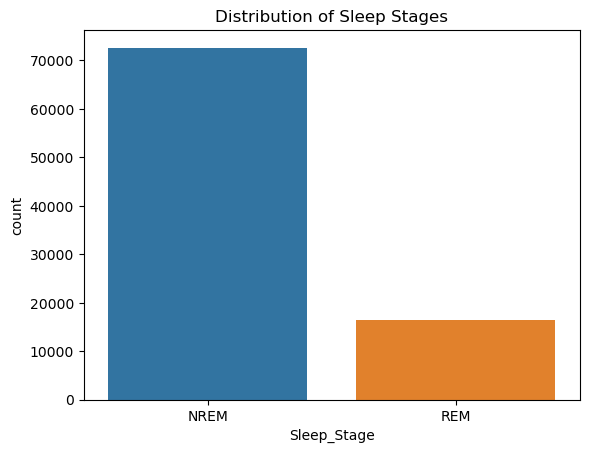

In [23]:
sns.countplot(x='Sleep_Stage', data=sleep_data)
plt.title('Distribution of Sleep Stages')
plt.show()

With this countplot, we can see that there is a large disbalance in the dataset between REM and NREM data points. However, this could also be due to the fact that N1, N2, and N3 sleep stages are all classified as "NREM". There are only labels for NREM though, and not the specific stages within that category. We will keep this in mind during the rest of our project, and analyze how this imbalance in # of datapoints per category in this dataset can impact our models.

Next, we will look at different metrics and the difference between them when calculated on NREM vs. REM waves. We tried these calculations across all metrics (mean frequency, spectral edge, median frequency, etc.), but found very little difference between the NREM and REM with the exception of mean power. Especially in regards to delta waves, there is a significant different between NREM and REM average power.

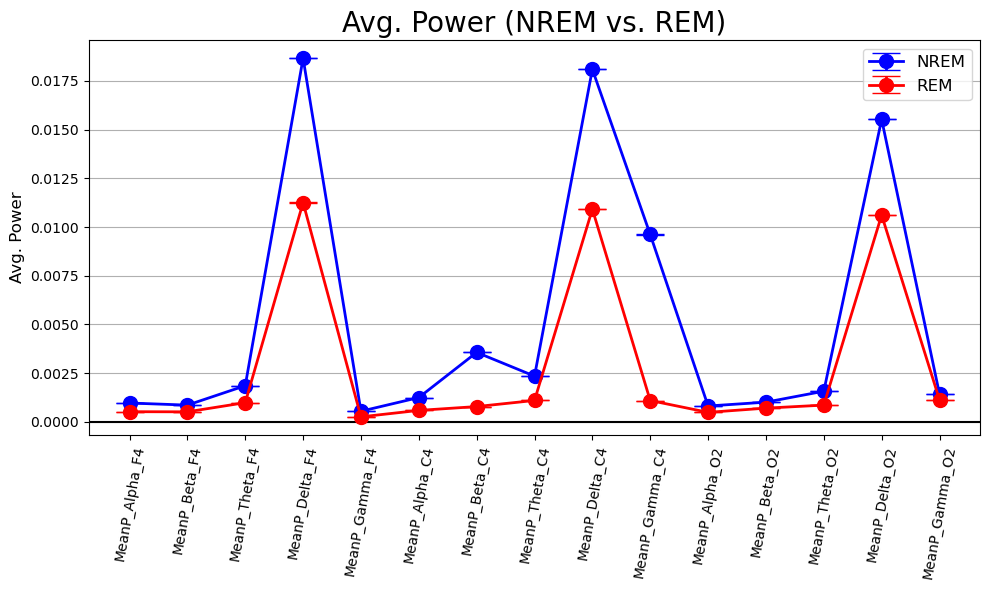

In [13]:
sleep_stage = sleep_data.groupby('Sleep_Stage').mean()
mean_p_columns = [col for col in sleep_data.columns if col.startswith("MeanP_")]
nrem_err = sleep_data[sleep_data['Sleep_Stage']=='NREM']
rem_err = sleep_data[sleep_data['Sleep_Stage']=='REM']
x = mean_p_columns
mean_df = sleep_stage[x]
nrem_df = sleep_stage.loc['NREM']
rem_df = sleep_stage.loc['REM']
nrem_y = [nrem_df[val] for val in x]
rem_y = [rem_df[val] for val in x]
y_nrem_err =  [nrem_err[val].std()/len(nrem_err[val]) for val in x]
y_rem_err = [rem_err[val].std() / len(rem_err[val]) for val in x]
fig,ax = plt.subplots(figsize=(10,6),tight_layout=True)
ax.errorbar(
    x,nrem_y,y_nrem_err,
    color='blue',
    marker = 'o',
    markersize = 10,
    linewidth = 2,
    capsize=10,
    label='NREM'
)
ax.errorbar(
    x,rem_y,y_rem_err,
    color='red',
    marker = 'o',
    markersize = 10,
    linewidth = 2,
    capsize=10,
    label='REM'
)
ax.set_title('Avg. Power (NREM vs. REM)', fontsize = 20)
ax.legend()
ax.set_ylabel('Avg. Power', fontsize = 12)
ax.set_xticks(x, fontsize=1)
ax.legend(fontsize=12)
ax.axhline(color='black')
ax.yaxis.grid(True, linestyle='-')
ax.tick_params(axis='x', labelsize=10, rotation=80)

There is a clear difference between NREM and REM. Through these graphs, we can also see that the highest power is associated with delta frequencies for ***both*** REM and NREM waves, and the NREM waves seem to have higher power values than REM for delta waves. This may be because delta waves is associated with very deep sleep, which can often be seen in the N3 stage. Since N3 is grouped into the NREM category, this is probably why the NREM is seen to have higher power.

Another helpful visualization to have would be one where we see how well certain variables correlate with each other, and maybe see if there is any correlations.

In [20]:
meanps= [elem for elem in sleep_data.columns if 'MeanP' in elem]
meanps.append('Sleep_Stage')

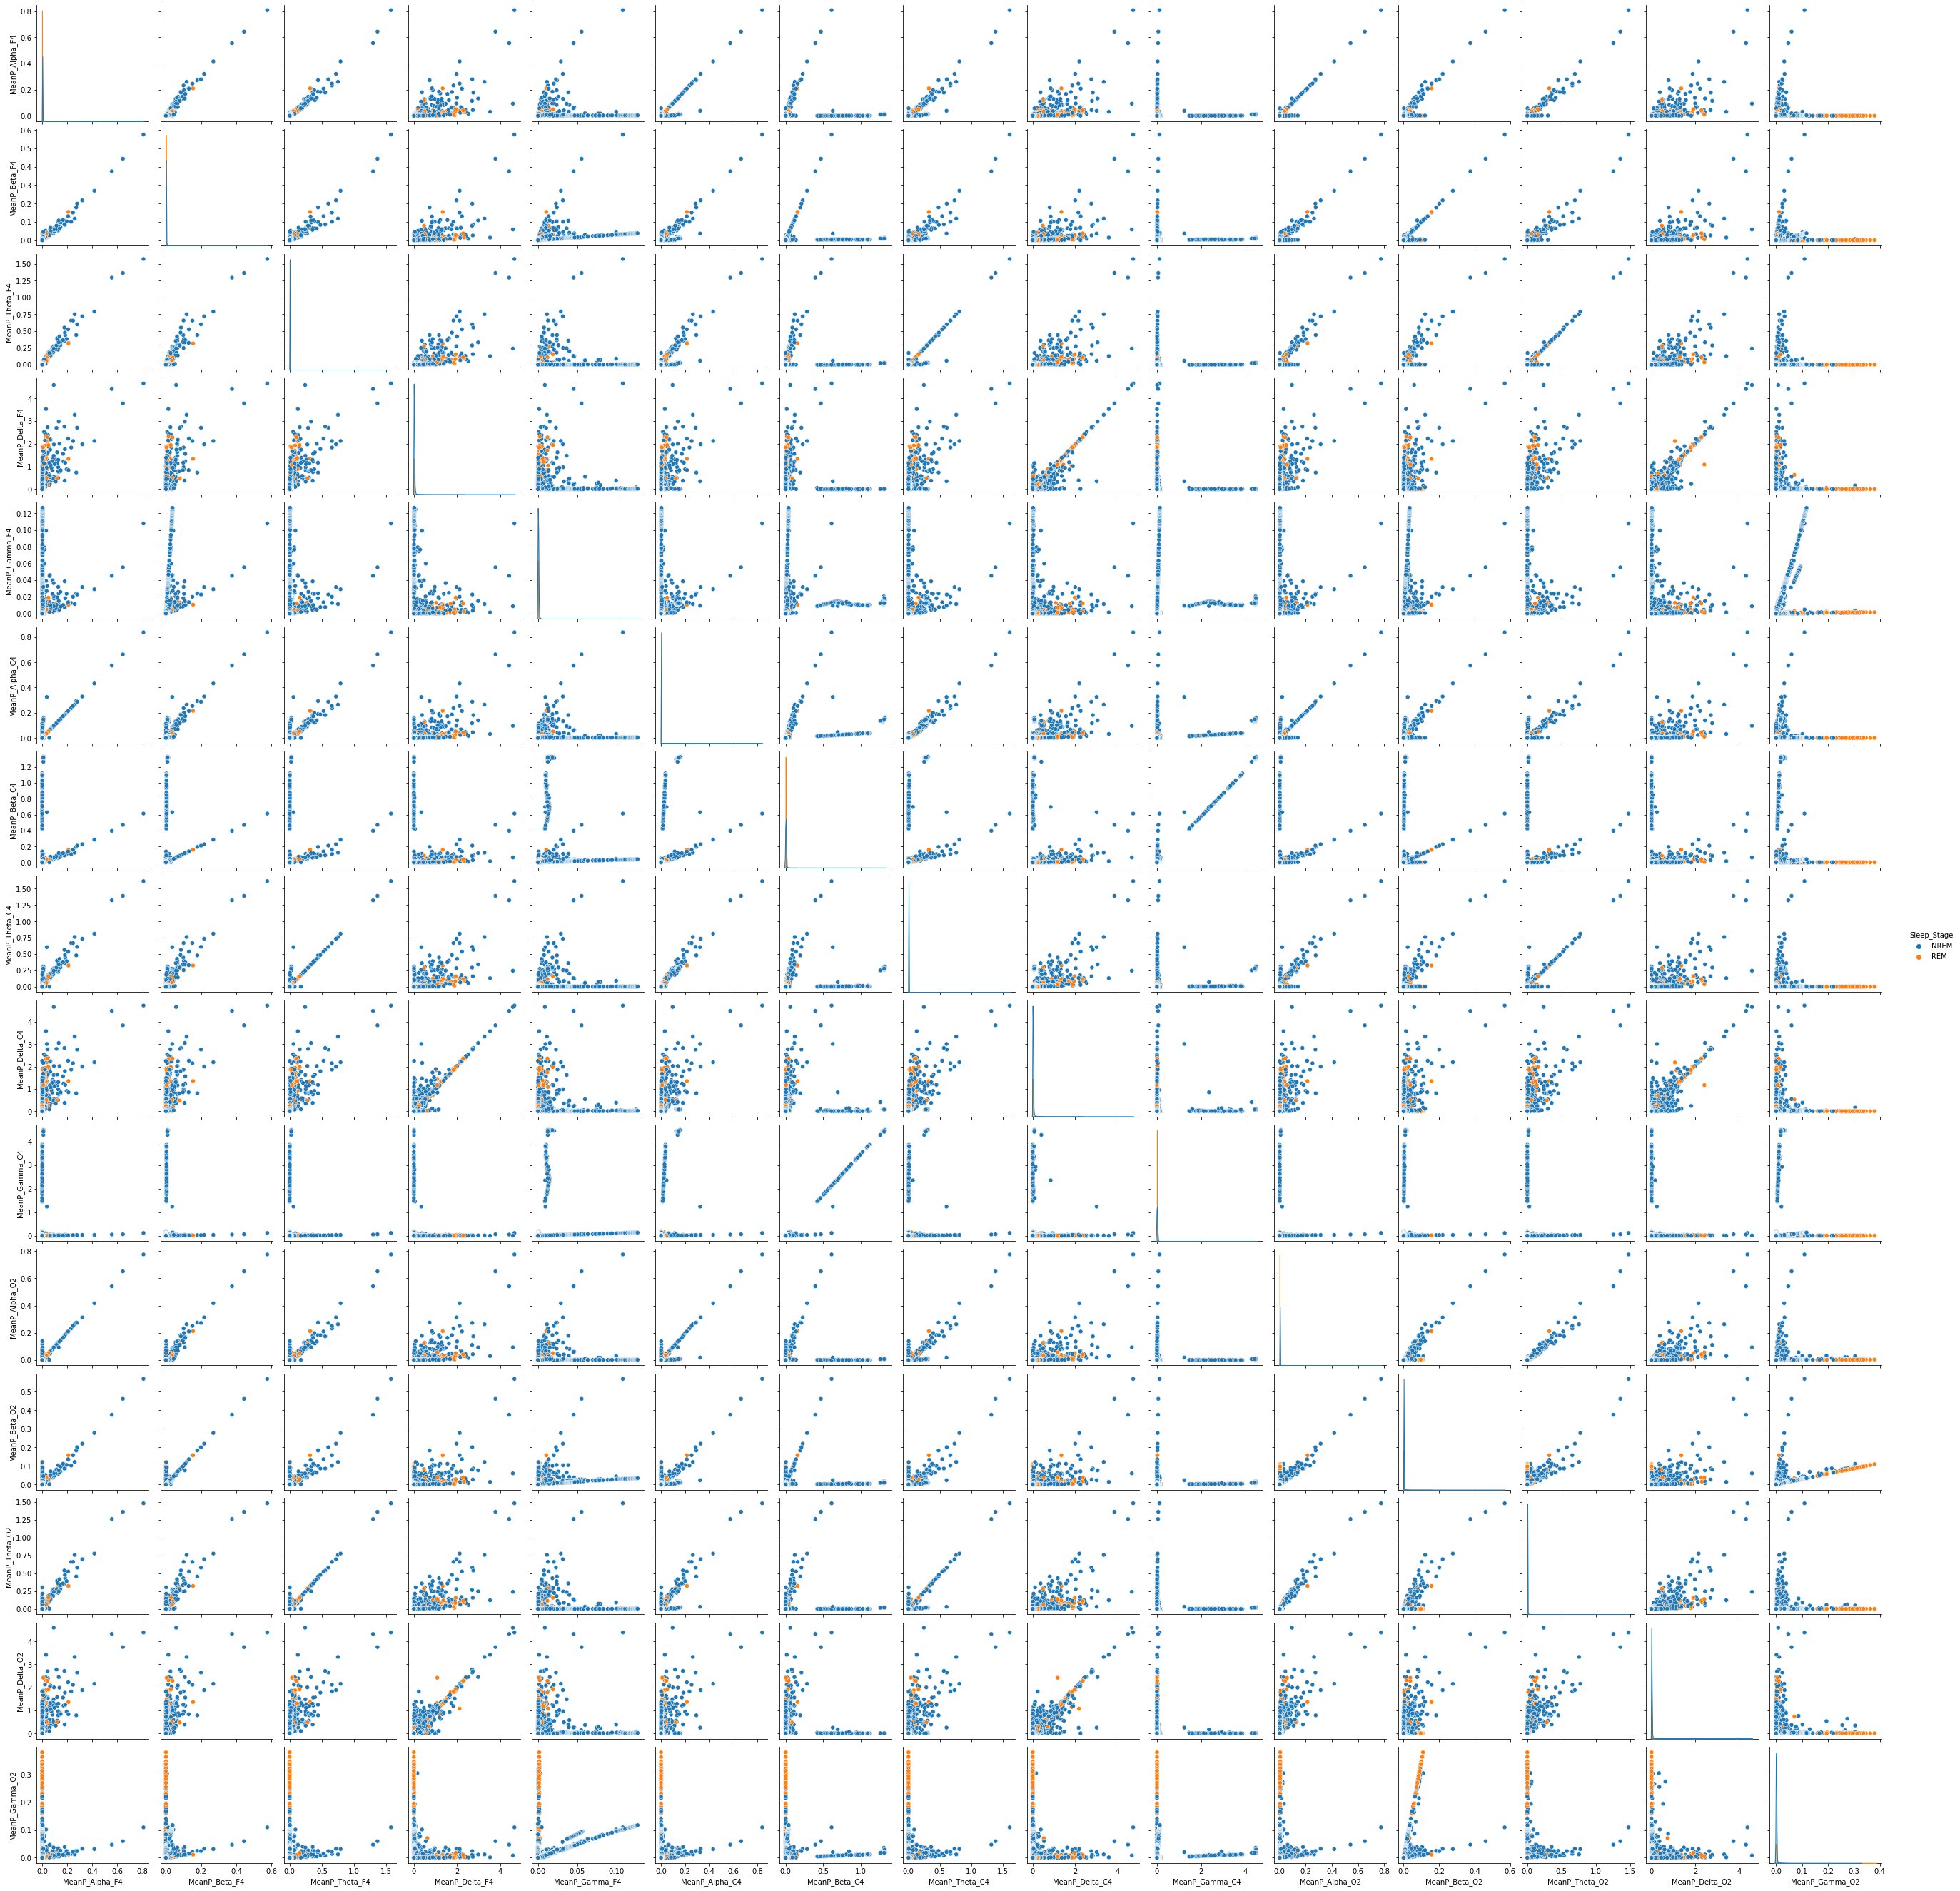

In [22]:
sns.pairplot(data = sleep_data[meanps], hue = 'Sleep_Stage')

As seen from the visualization, even though the mean of power variables tended to show the most difference in average value hetween REM and NREM observations, there is still not much seperation between REM and NREM datapoints in any of the variables except MeanP_Gamma_O2

In [14]:
file_path = 'REM_NREM.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and its summary
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89096 entries, 0 to 89095
Data columns (total 76 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sleep_Stage             89096 non-null  object 
 1   MeanP_Alpha_F4          89096 non-null  float64
 2   MedianF_Alpha_F4        89096 non-null  float64
 3   MeanF_Alpha_F4          89096 non-null  float64
 4   Spectral Edge_Alpha_F4  89096 non-null  float64
 5   PeakF_Alpha_F4          89096 non-null  float64
 6   MeanP_Beta_F4           89096 non-null  float64
 7   MedianF_Beta_F4         89096 non-null  float64
 8   MeanF_Beta_F4           89096 non-null  float64
 9   Spectral Edge_Beta_F4   89096 non-null  float64
 10  PeakF_Beta_F4           89096 non-null  float64
 11  MeanP_Theta_F4          89096 non-null  float64
 12  MedianF_Theta_F4        89096 non-null  float64
 13  MeanF_Theta_F4          89096 non-null  float64
 14  Spectral Edge_Theta_F4  89096 non-null

(  Sleep_Stage  MeanP_Alpha_F4  MedianF_Alpha_F4  MeanF_Alpha_F4  \
 0        NREM         0.00034          10.11512        17.85756   
 1        NREM         0.00035          10.73951        17.60780   
 2        NREM         0.00035           9.36585        17.60780   
 3        NREM         0.00050          10.36488        16.60878   
 4        NREM         0.00072           9.36585        15.98439   
 
    Spectral Edge_Alpha_F4  PeakF_Alpha_F4  MeanP_Beta_F4  MedianF_Beta_F4  \
 0                17.48293        10.24000        0.00047         17.73268   
 1                17.10829         9.11610        0.00048         16.85854   
 2                16.98341         9.24098        0.00042         17.35805   
 3                15.85951         7.99220        0.00053         15.48488   
 4                15.48488         7.99220        0.00067         15.11024   
 
    MeanF_Beta_F4  Spectral Edge_Beta_F4  ...  MeanP_Delta_O2  \
 0       25.35024               27.47317  ...         0

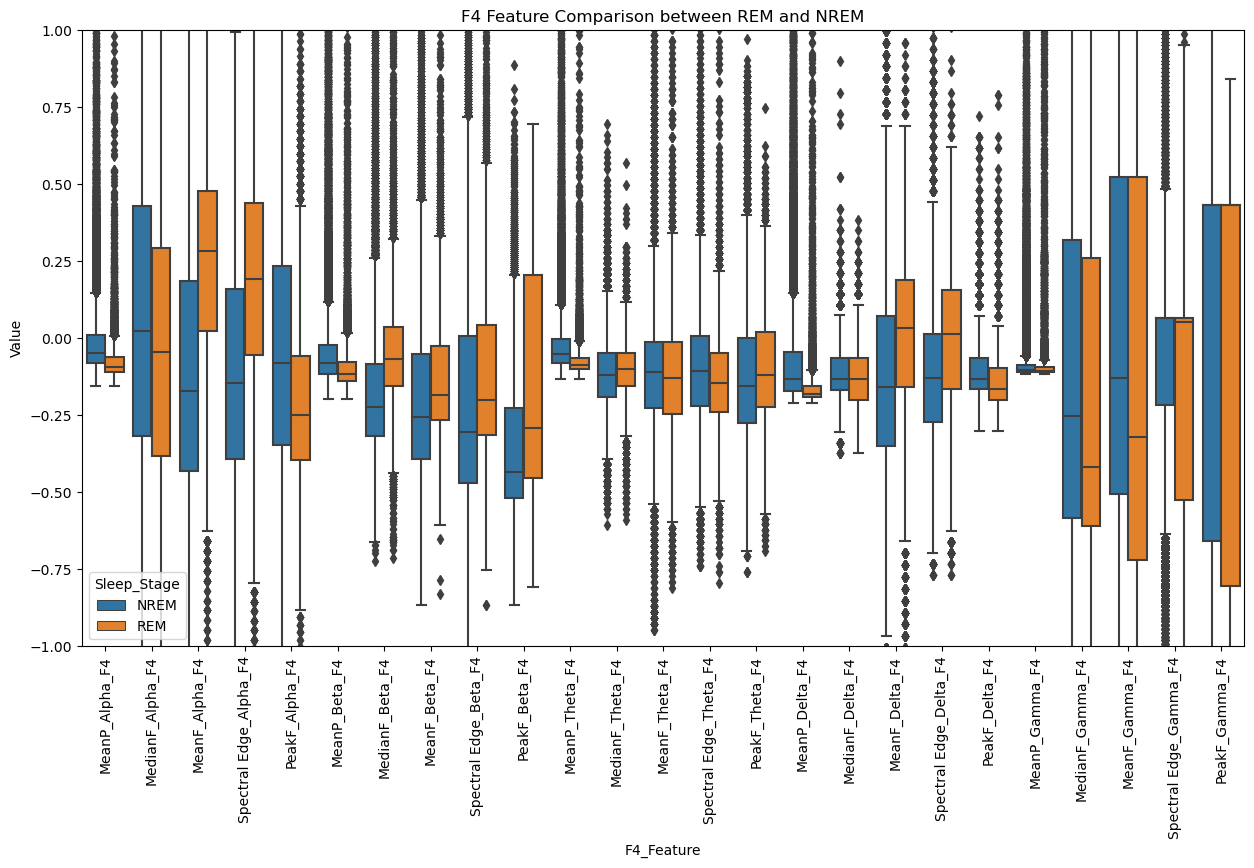

In [43]:
# Load the dataset
file_path = 'REM_NREM.csv'  
data = pd.read_csv(file_path)

# Filter out columns related to F4
columns = [col for col in data.columns if 'F4' in col]
numerical_data = data[['Sleep_Stage'] + columns]
numerical_values = numerical_data[columns]

# Scale the data
scaler = StandardScaler()
scaler.fit(numerical_values)
scaled_values = scaler.transform(numerical_values)

data_scaled = pd.DataFrame(scaled_values, columns=columns)
data_scaled['Sleep_Stage'] = numerical_data['Sleep_Stage']

# Plotting
F4_data_melted = data_scaled.melt(id_vars=['Sleep_Stage'], var_name='F4_Feature', value_name='Value')
plt.figure(figsize=(15, 8))
sns.boxplot(data=F4_data_melted, x='F4_Feature', y='Value', hue='Sleep_Stage')
plt.xticks(rotation=90)
plt.title('F4 Feature Comparison between REM and NREM')
plt.ylim(-1, 1)
plt.show()

Taking a deeper look into one lobe for our data, it becomes clear that certain metrics for measuring waves have more clear cut differences then others. Visually, the most clear divide between the two categorized sleep stages is `MeanP` category for Alpha, Theta, and Delta waves. This shows us that our data has some consistency with scientific research on sleep and that we may be able to find some underlaying pattern in this data.

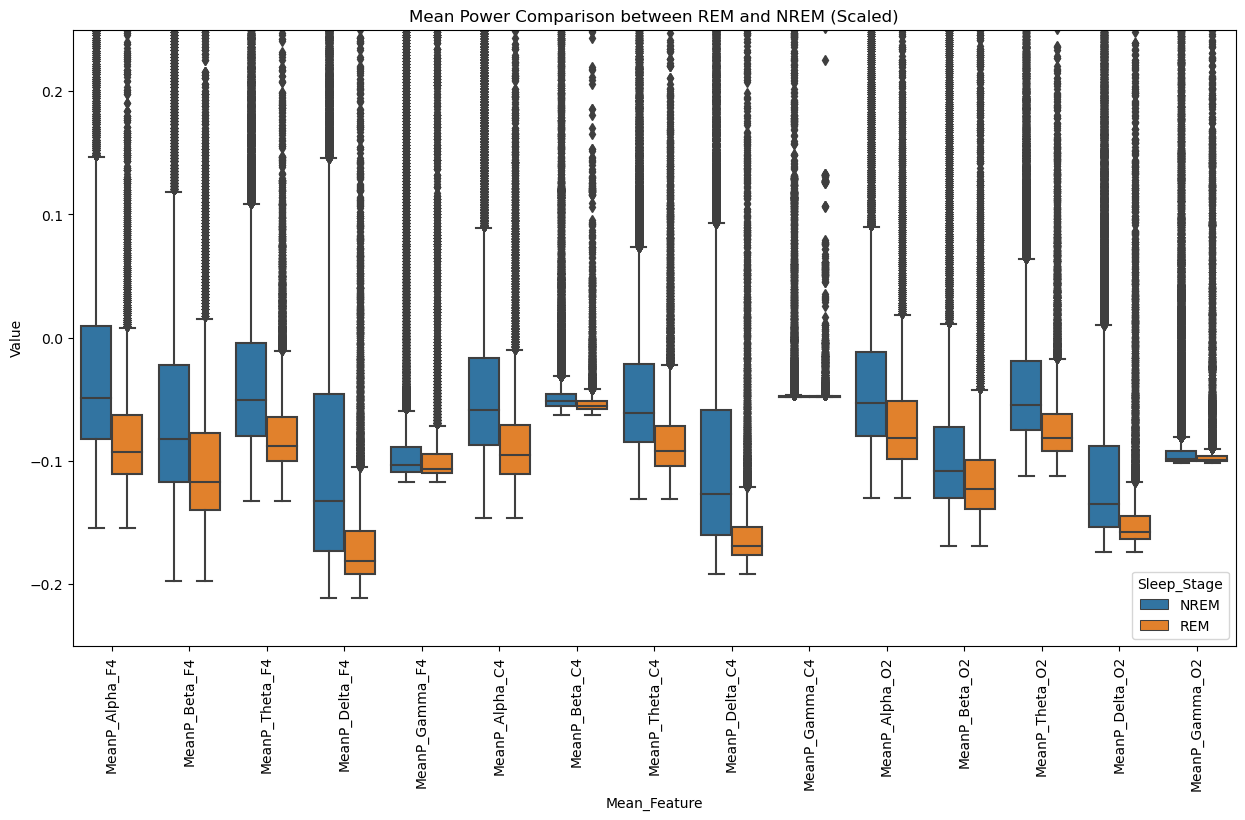

In [44]:
# Filter out columns except for Mean Power
mean_columns = [col for col in data.columns if 'MeanP' in col]
mean_data = data[['Sleep_Stage'] + mean_columns]
mean_values = mean_data[mean_columns]

# Scale
scaler = StandardScaler()
scaler.fit(mean_values)
scaled_values = scaler.transform(mean_values)

# Create a DataFrame from the scaled values
data_scaled = pd.DataFrame(scaled_values, columns=mean_columns)
data_scaled['Sleep_Stage'] = mean_data['Sleep_Stage']

# Plotting
mean_data_melted = data_scaled.melt(id_vars=['Sleep_Stage'], var_name='Mean_Feature', value_name='Value')
plt.figure(figsize=(15, 8))
sns.boxplot(data=mean_data_melted, x='Mean_Feature', y='Value', hue='Sleep_Stage')
plt.xticks(rotation=90)
plt.title('Mean Power Comparison between REM and NREM (Scaled)')
plt.ylim(-0.25, 0.25)
plt.show()

Looking deeper into MeanP, or the power of each samples Fourier transform, we see clear divides among the NREM and REM categories. The number of outliars is large for both as sleep data can be highly variable but since our goal is to try to classify sleep using an unsupervised techniques, we will attempt to use larger amounts of features and then scaling back with more selective features if this doesn't work.

# Proposed Solution

EEG signal analysis requires careful preprocessing and feature extraction to prepare the data for use in unsupervised algorithms. Our solution will begin with a brief exploratory data analysis to better understand our data and help inform our preprocessing efforts of signal denoising and artifact reduction. Once preprocessed we will extract features and then classification using an unsupervised learning model. Assuming EDA showed no issues, we will start out by applying a band-pass filter to the EEG data to retain only the relevant frequency ranges, typically between 1-55 Hz, to exclude high-frequency noise and very low-frequency drift. It may also be necessary to downsample the signal to a lower frequency to reduce the computation load and we would do this following the Nyquist theorem. 

Principal Component Analysis (PCA) and UMAP will then be used to reduce the dimensionality of the dataset, focusing on components that capture the most variance. This step will be complemented by additional feature engineering efforts to extract time-domain, frequency-domain, and time-frequency domain features, offering a comprehensive representation of the EEG signals. For clustering, we will explore unsupervised learning approaches such as Gaussian Mixture Models, spectral clustering, and DBSCAN. The optimal number of clusters will be determined using methods like the elbow method, or gap statistic, ensuring a meaningful classification of the EEG signals into distinct groups.

Given that our dataset is pre-segmented into NREM and REM sleep categories, we can leverage these classifications to validate our unsupervised learning model. This initial step will enable us to refine our data processing pipeline for these two broad sleep categories. Our ultimate objective is to expand this model to classify all distinct sleep stages without relying on predefined labels or external knowledge, such as the established sleep stage categories in neuroscience. This approach ensures that our model independently discovers the underlying patterns in the data.

# Evaluation Metrics

For the unsupervised clustering task of sleep stage classification using EEG signal data, the Silhouette Score is a relevant evaluation metric. The Silhouette Score measures how well-defined and separated the clusters are within the data. It takes into account both the cohesion within clusters and the separation between clusters. The Silhouette Score ranges from -1 to 1, where a higher score indicates better-defined clusters. The overall Silhouette Score for the entire dataset is the average of the Silhouette Scores for each data point. This metric provides a quantitative measure of the clustering quality, with a higher score indicating well-separated and distinct clusters, aligning with the goal of accurately identifying sleep stages in EEG signals. The formula for the Silhouette Score for a single data point 'i' is given by: 
$$S(i)=[b(i)-a(i)/[max(a(i),b(i)]$$
Where a(i) is the average distance from the i-th data point to other points in the same cluster and b(i) is the smallest average distance from the i-th data point to points in a different cluster.

# Results

## PCA

We will begin with a PCA.

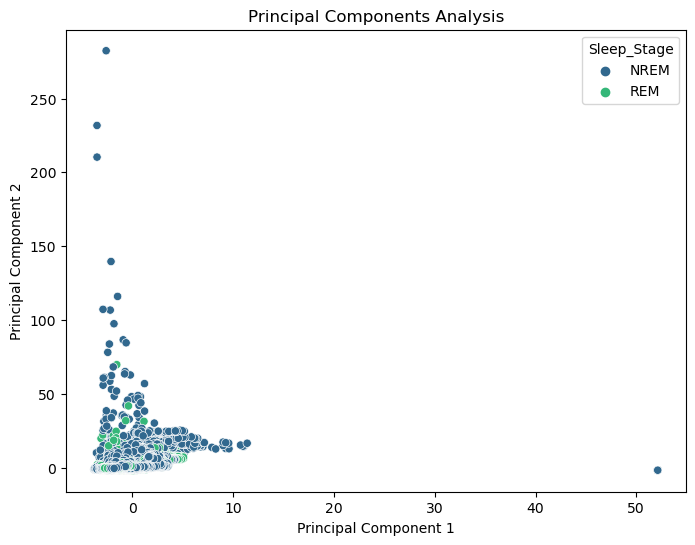

In [24]:
X_sleep = sleep_data.drop(columns=['Sleep_Stage'])
y_sleep = sleep_data['Sleep_Stage']

# Standardize the features
scaler_sleep = StandardScaler()
X_standardized_sleep = scaler_sleep.fit_transform(X_sleep)

# Apply PCA with 10 components
pca_sleep = PCA(n_components=10)
pcs_sleep = pca_sleep.fit_transform(X_standardized_sleep)

# Transform it into a DataFrame
pcs_sleep_df = pd.DataFrame(pcs_sleep, columns=[f'PC{i+1}' for i in range(10)])
pcs_sleep_df.index = sleep_data.index

# Concatenate the target variable 'Sleep_Stage' to the PCA DataFrame
pcs_sleep_df['Sleep_Stage'] = y_sleep.values

# Function to plot the components
def plot_components(df):
    # Your plotting function (replace with your actual plotting code)
    # For example, a scatter plot for the first two principal components
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PC1', y='PC2', hue='Sleep_Stage', data=df, palette='viridis')
    plt.title('Principal Components Analysis')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Plot the components
plot_components(pcs_sleep_df)

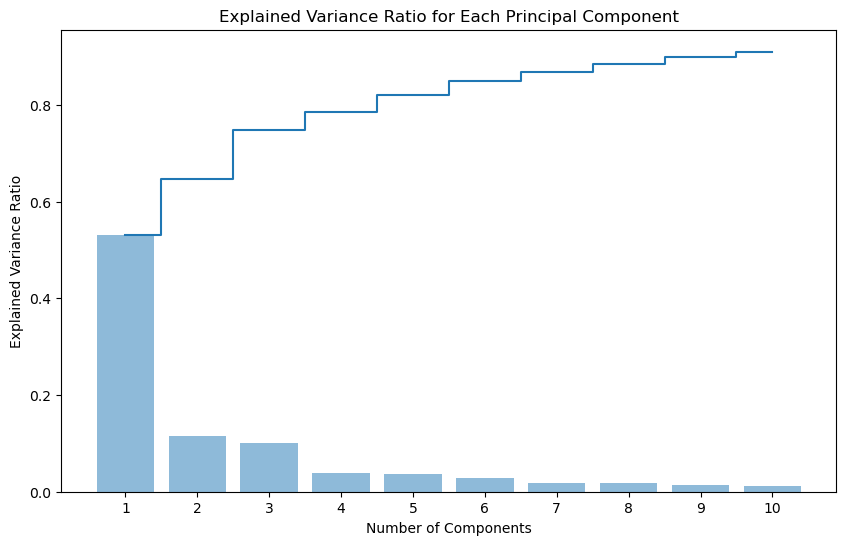

In [25]:
X_standardized_sleep = scaler_sleep.fit_transform(X_sleep)

# Apply PCA with 10 components
pca_sleep = PCA(n_components=10)
pcs_sleep = pca_sleep.fit_transform(X_standardized_sleep)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), pca_sleep.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 11), np.cumsum(pca_sleep.explained_variance_ratio_), where='mid')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.xticks(range(1, 11))
plt.show()

Looking at our PCA analysis, it is hard to visualize the dataset because we have a lot of the features as 2-dimensional representations. While observing the elbow in the graph, 4 components seem to describe around 90 % of the variance. 

## UMAP

Another dimensionality reduction technique that can be attempted here is UMAP. UMAP could be used to reduce dimensionality while ensuring that points close to each other in high dimensional space stay close together in low dimensional space. Many hyperparameter combinations were experimented with, and can be found in the notebook title "UMAP" in the same repository as this notebook. Some of the best performances can be found below. 

First, however, the data is preprocessed and normalized to ensure that the scale of the data does not affect the UMAP procedure.

In [25]:
exclude = sleep_data['Sleep_Stage']

scaler = MinMaxScaler()
sleep_data_norm = sleep_data.drop(columns=['Sleep_Stage'])
sleep_data_norm = pd.DataFrame(scaler.fit_transform(sleep_data_norm), columns=sleep_data_norm.columns, index=sleep_data_norm.index)

sleep_data_norm['Sleep_Stage'] = exclude

In [26]:
sleep_data_norm_unlabeled = sleep_data_norm.drop('Sleep_Stage', axis = 1)

The first parameter explored was the number of neighbors, and of the values tried, the best one seemed to be 50 neighbors. The minimum distance was kept constant at 0.1, and the visualization of the data can be seen below. Clusters do form, but they are very sparse and not on the basis of REM and NREM.

In [34]:
um50 = UMAP(n_neighbors = 50, min_dist = 0.1)
ucs50 = um50.fit_transform(sleep_data_norm_unlabeled)

ucs50 = pd.DataFrame(ucs50)
ucs50_labeled = ucs50
ucs50_labeled['Sleep_Stage'] = exclude

<AxesSubplot:xlabel='0', ylabel='1'>

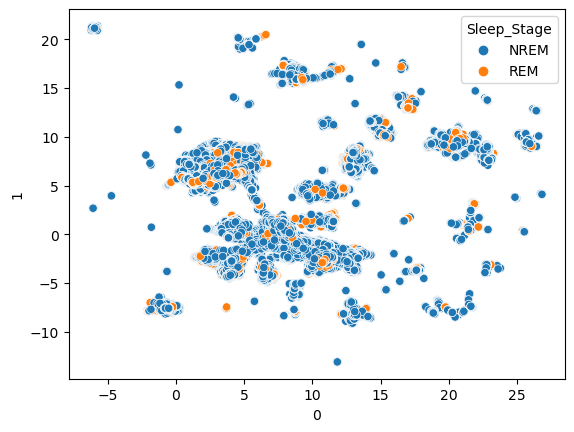

In [35]:
sns.scatterplot(x = ucs50_labeled.iloc[:, 0], y = ucs50_labeled.iloc[:, 1], hue = ucs50_labeled['Sleep_Stage'])

Having worked on the number of neighbors, the next hyperparameter to look at was the minimum distance. A variety of values were tried for this too, and a minimum distance of 0.9 seemed to form the best clusters, but again, these clusters did not seperate NREM and REM datapoints.

In [34]:
um_dist9 = UMAP(n_neighbors = 50, min_dist = 0.9)
ucs_dist9 = um_dist9.fit_transform(sleep_data_norm_unlabeled)

ucs_dist9 = pd.DataFrame(ucs_dist9)
ucs_dist9_labeled = ucs_dist9
ucs_dist9_labeled['Sleep_Stage'] = exclude

<AxesSubplot:xlabel='0', ylabel='1'>

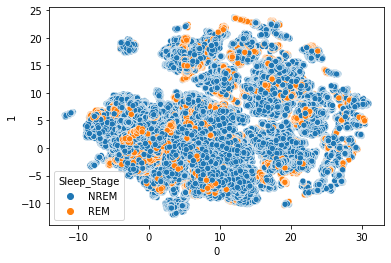

In [35]:
sns.scatterplot(x = ucs_dist9_labeled.iloc[:, 0], y = ucs_dist9_labeled.iloc[:, 1], hue = ucs_dist9_labeled['Sleep_Stage'])

Due to the inability to see seperation between REM and NREM in two dimensional space using UMAP, regardless of hyperparameter tuning, this led to the possibility of exploring more than two dimensions. The n_components hyperparameter was then tuned, leading to the data being projected into 5, 10, 25, and 50 dimensions. Because there was no way to visualize if there is seperation between REM and NREM in higher dimensions, a GMM was employed to try clustering the data. The predictions of this GMM helped indicate what cluster each data point belonged to, and these predictions relative to the true labels could help indicate whether the UMAP dimensionality reduction is of any help.

In [27]:
um_50comp = UMAP(n_neighbors = 50, min_dist = 0.9, n_components = 50)
ucs_50comp = um_50comp.fit_transform(sleep_data_norm_unlabeled)

ucs_50comp = pd.DataFrame(ucs_50comp)
ucs_50comp_labeled = ucs_50comp
ucs_50comp_labeled['Sleep_Stage'] = exclude

<AxesSubplot:xlabel='0', ylabel='1'>

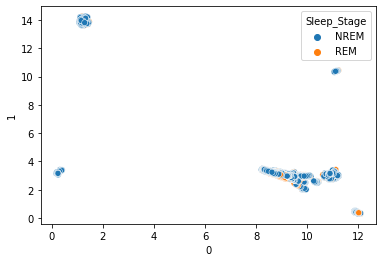

In [28]:
sns.scatterplot(x = ucs_50comp_labeled.iloc[:, 0], y = ucs_50comp_labeled.iloc[:, 1], hue = ucs_50comp_labeled['Sleep_Stage'])

Two types of GMMs were used: one with 2 components and one with 4. The one with two components has the goal of seperating a cluster of REM and a cluster of NREM data points, while the one with 4 components would ideally cluster the NREM data further, considering the fact that NREM would ideally be divided into N1, N2, and N3 stages of sleep

In [29]:
gmm2 = GaussianMixture(n_components = 2)
gmm4 = GaussianMixture(n_components = 4)

In [30]:
ucs_50comp_labeled['preds2'] = gmm2.fit_predict(ucs_50comp.drop('Sleep_Stage', axis = 1))
ucs_50comp_labeled['preds4'] = gmm4.fit_predict(ucs_50comp.drop(['Sleep_Stage', 'preds2'], axis = 1))

<AxesSubplot:xlabel='Sleep_Stage', ylabel='count'>

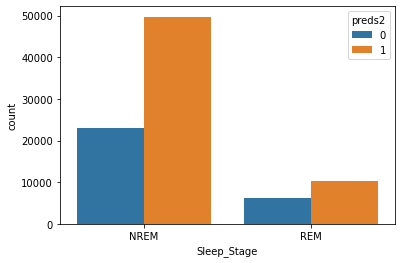

In [31]:
sns.countplot(data = ucs_50comp_labeled, x = 'Sleep_Stage', hue = 'preds2')

<AxesSubplot:xlabel='Sleep_Stage', ylabel='count'>

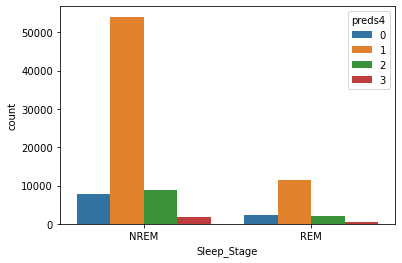

In [32]:
sns.countplot(data = ucs_50comp_labeled, x = 'Sleep_Stage', hue = 'preds4')

The model that clustered relatively best did it on the UMAP reduction to 50 dimensions, but even that was poor considering that neither the 2 nor the 4 component GMM did well, with both predicting one class predominantly in both REM and NREM datapoints.

## Spectral Clustering

Spectral clustering was also employed in an attempt to use an algorithm that would work on non convex clusters. However, that did not yield great results either. The code and results can be found in the notebook in the same repository titled "Spectral Clustering". Due to the computational intensiveness and the length of time required to run that code, the code and results were not added to this notebook. However, examining the results from that spectral clustering demonstrates results that follow a similar trend to the GMM results on the UMAP data. Once again, the same class was predominantly predicted in both NREM and REM datapoints, indicating poor clustering. With both 2 and 4 components, almost every point was clustered into one large cluster. Due to how inefficient spectral clustering was, it did not seem feasible to try and optimize this.

## DBSCAN

Let us explore DBSCAN next because it can be good with non-convex data clusters that the PCA otherwise cannot handle, making it compatible with this dataset.

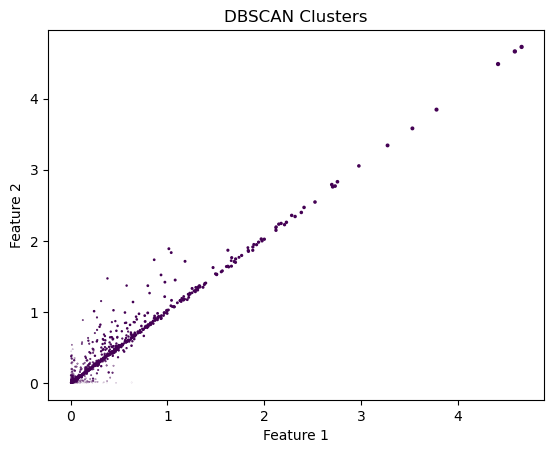

In [20]:
numeric_columns = sleep_data.select_dtypes(include=['number'])
features = numeric_columns.head(20000)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


eps = 76 
min_samples = 1.0 


dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(scaled_features)


plt.scatter(features['MeanP_Delta_F4'], features['MeanP_Delta_C4'],features['MeanP_Delta_O2'],c=clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clusters')
plt.show()

Above you can find a DBSCAN, which unfortunately didn't work that well. So now we will try a GMM.

## GMM

Since DBSCAN didn't work that well, we will try another model - GMM.

In [45]:
mean_data_labeled = mean_data
mean_data.head()

,Sleep_Stage,MeanP_Alpha_F4,MeanP_Beta_F4,MeanP_Theta_F4,MeanP_Delta_F4,MeanP_Gamma_F4,MeanP_Alpha_C4,MeanP_Beta_C4,MeanP_Theta_C4,MeanP_Delta_C4,MeanP_Gamma_C4,MeanP_Alpha_O2,MeanP_Beta_O2,MeanP_Theta_O2,MeanP_Delta_O2,MeanP_Gamma_O2
0,NREM,0.00034,0.00047,0.00041,0.00159,0.000100,0.00038,0.00054,0.00048,0.00138,0.000100,0.00023,0.00034,0.00025,0.00112,0.000076
1,NREM,0.00035,0.00048,0.00040,0.00128,0.000094,0.00041,0.00064,0.00051,0.00134,0.000110,0.00023,0.00032,0.00027,0.00070,0.000072
2,NREM,0.00035,0.00042,0.00052,0.00134,0.000094,0.00043,0.00047,0.00078,0.00156,0.000087,0.00025,0.00031,0.00036,0.00077,0.000069
3,NREM,0.00050,0.00053,0.00077,0.00290,0.000087,0.00067,0.00073,0.00139,0.00549,0.000095,0.00027,0.00033,0.00047,0.00130,0.000070
4,NREM,0.00072,0.00067,0.00143,0.00574,0.000082,0.00120,0.00100,0.00305,0.00781,0.000097,0.00036,0.00039,0.00050,0.00123,0.000060


In [46]:
data_labels = mean_data['Sleep_Stage']
data_features = mean_data.drop(columns=['Sleep_Stage'])

data_sampled_features = data_features.sample(frac=1, random_state=99)
data_sampled_labels = data_labels.loc[data_sampled_features.index]

# Split into train and test sets
train_features, test_features, train_labels, test_labels = train_test_split(
    data_sampled_features,
    data_sampled_labels,
    test_size=0.2,
    random_state=99
)

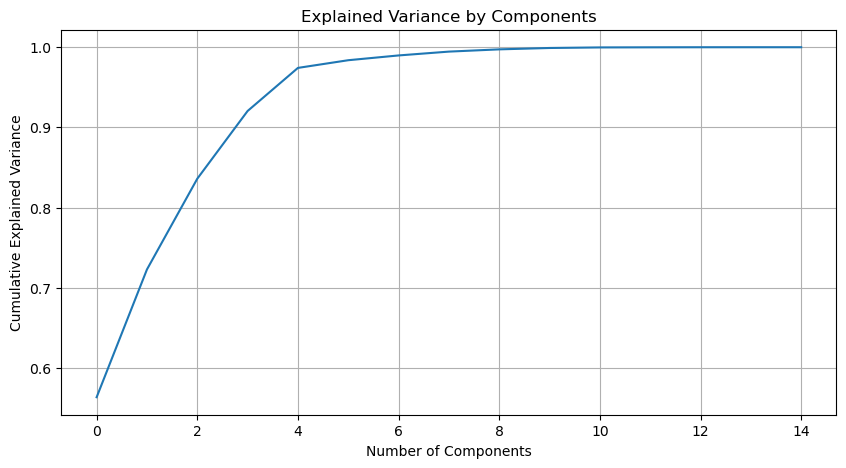

In [47]:
# Scale
train_features_scaled = scaler.transform(train_features)
test_features_scaled = scaler.transform(test_features)

# Calculate PCA for a range
pca = PCA().fit(train_features_scaled)

# Plot the curve
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

In [49]:
# Apply PCA with 4 components as that is the elbow point
pca = PCA(n_components=4)
train_features_pca = pca.fit_transform(train_features_scaled)
test_features_pca = pca.transform(test_features_scaled)

# Fit GMM
gmm_pca = GaussianMixture(n_components=2, random_state=99)
gmm_pca.fit(train_features_pca)

# Predict clusters
train_pred_pca = gmm_pca.predict(train_features_pca)
test_pred_pca = gmm_pca.predict(test_features_pca)

# Evaluate using silhouette score
train_silhouette_pca = silhouette_score(train_features_pca, train_pred_pca)
test_silhouette_pca = silhouette_score(test_features_pca, test_pred_pca)

# Number of samples given to each category
train_cluster_counts = np.bincount(train_pred_pca)
test_cluster_counts = np.bincount(test_pred_pca)

train_silhouette_pca, test_silhouette_pca, train_cluster_counts, test_cluster_counts

(0.7761078520001161,
 0.7777425918325026,
 array([63346,  7930]),
 array([15881,  1939]))

0    15881
1     1939
Name: Predicted_Cluster, dtype: int64
Actual_Label        NREM   REM
Predicted_Cluster             
0                  12906  2975
1                   1673   266


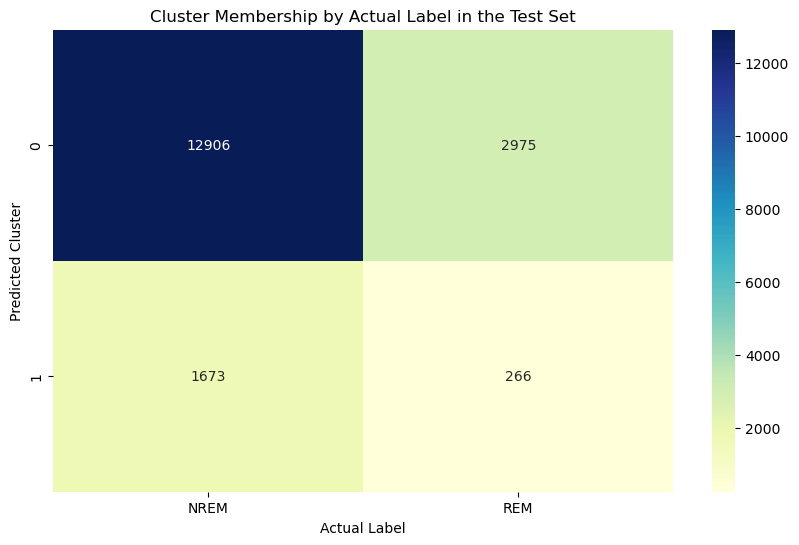

In [50]:
# Dummy array for heatmap
column_names = [f"Feature_{i}" for i in range(test_features_pca.shape[1])]
test_features_df = pd.DataFrame(test_features_pca, columns=column_names)
test_features_df['Predicted_Cluster'] = test_pred_pca

# Analyze clusters
cluster_counts = test_features_df['Predicted_Cluster'].value_counts()
print(cluster_counts)

# Analyze clusters with labels
test_with_labels_df = test_features_df.copy()
test_with_labels_df['Actual_Label'] = test_labels.reset_index(drop=True)
cluster_label_counts = test_with_labels_df.groupby(['Predicted_Cluster', 'Actual_Label']).size().unstack(fill_value=0)
print(cluster_label_counts)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_label_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Cluster Membership by Actual Label in the Test Set')
plt.ylabel('Predicted Cluster')
plt.xlabel('Actual Label')
plt.show()

From this analysis, it is clear that we are overfitting the NREM category which could be explained due to the large amount of noise in the data, outliers, or the fact that there are more NREM datapoints then REM ones.

## Random Forest

After seeing a unfortunate lack of good results from our all unsupervised models (we attempted almost all models that we have covered in this course), we decided to see how our data would do with a supervised learning model. We went with a Random Forest Classifier based on prior work of the dataset that showed us this model is good. 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_sleep, y_sleep, test_size=0.2, random_state=42)

# training the random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# evaluating the model
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy score = ', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

        NREM       0.94      0.98      0.96     14656
         REM       0.88      0.72      0.79      3164

    accuracy                           0.93     17820
   macro avg       0.91      0.85      0.88     17820
weighted avg       0.93      0.93      0.93     17820

Accuracy score =  0.9329405162738497


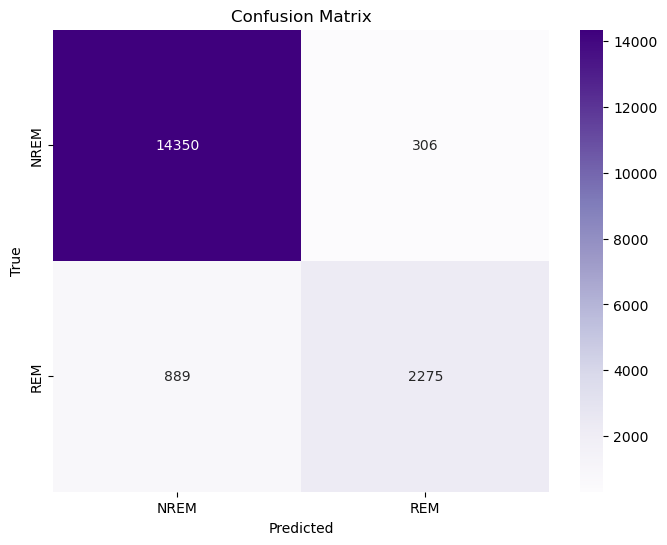

In [27]:
# plotting confusion matrix for random forest
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

We can see that the data works very well with a random forest classifier, which gives us a 93% accuracy.

# Discussion

### Interpreting the result
The biggest takeaway from this project was that the data was not highly suitable for unsupervised learning. From the EDA to the dimensionality reduction, all visualizations pointed towards the fact that the data was not very separable on the basis of REM and NREM data. As a result, since most of the techniques used were clustering techniques, the algorithms did not do a great job of clustering REM and NREM observations separately. Rather, the clusters were an amalgamation of both for the most part. Due to the inability to separate REM and NREM points, finding clusters of N1, N2, and N3 within the NREM observations was futile.
Dimensionality reduction techniques were employed in an attempt to reveal relationships in the data that were not entirely apparent in the higher dimensional space. The PCA was promising initially, as it reduced the data from 75 dimensions to 4 using the elbow method. The 4 components described around 80% of the variance of the dataset, and further components did not seem very useful, as they did not describe enough variance of the data to be impactful. However, upon exploration with a Gaussian Mixture Model, the results were not great.
	The other dimensionality reduction used was UMAP, and that proved to be unpromising from the start. Throughout the hyperparameter tuning process, visualizations were created for every UMAP model that was attempted, and none of them proved to be great at separating REM and NREM data. Although increasing the number of components seemed to help, they were very far from producing meaningful results when put into a Gaussian Mixture Model. The GMMs seemed to almost always group the majority of both NREM and REM observations into the same cluster.
	Due to the failures of the dimensionality reduction techniques, DBSCAN and spectral clustering were used to experiment with algorithms that worked on non convex datasets. Both DBSCAN and spectral clustering proved very computationally expensive, making them very difficult to optimize, and in both cases the same issue occurs where a majority of the data is grouped into one large cluster containing most of the NREM and most of the REM observations. Considering the poor efficiency, it did not make sense to proceed with optimizing these models.
Finally, referencing prior work on the dataset led to the discovery of using random forests on the dataset. A random forest is a supervised technique, and it produced an accuracy of around 93%, which is much better than the unsupervised techniques that we had employed. This is likely because, instead of finding clusters, the random forest uses the data labels to identify a nonlinear decision boundary, and that is likely a much better separator of the data than using clusters.



### Limitations

There are quite a few limitations to the project that led to the unsupervised models not achieving great performance. The biggest limitation has to do with the data itself, and the inseparability of the REM and NREM data points. In every EDA and dimensionality reduction visualization, it is hard to see any kind of clustering or separation between points from the REM stage of sleep versus the NREM stage of sleep. As a result, it brings into question if clustering would really be the most appropriate technique to use on this dataset, considering that the lack of separation means that most clustering techniques would create clusters with a good amount of both REM and NREM observations. Another limitation concerning the data was the fact that it is not raw EEG data. Instead, it is EEG data that has already been processed, leaving only statistics about the raw EEG data, and as a result, it is possible that there is some information lost there. It is possible that having the raw EEG data and processing it specifically for this task may have helped attain data that clusters better. It may have allowed for several new dimensions that could be the difference in clustering REM and NREM points. The size of the dataset and computational resources available also posed some limitations. Considering that there are 75 variables and more than 85,000 observations, it is quite computationally expensive to work with this dataset, and it makes some algorithms like hierarchical clustering completely unfeasible with the computational resources at hand. In fact, even spectral clustering was only possible when considering about a quarter of the dataset, and even that took quite some time to run, making it difficult to optimize. Thus, it is possible that the computational limits prevented the discovery of the right hyperparameter settings that would have allowed for better clustering or dimensionality reduction, and an extension of this project would be to perform a more rigorous model selection with more computational resources. Finally, the last limitation is that only about 5 unsupervised techniques were explored in this project due to time and availability of resources. It is possible that there are more advanced algorithms that would have created more appropriate clusterings.

### Ethics & Privacy

In our EEG signal classification project, we are aware of potential ethical concerns and data privacy issues that demand our careful consideration. Firstly, utilizing medical data, especially from sleep recordings, requires us to prioritize patient privacy. Our dataset, collected from Haaglanden Medisch Centrum in The Netherlands, is publicly available on Kaggle. It is anonymized, and any personally identifiable information has been handled.

Furthermore, the nature of classifying sleep stages using EEG data raises the specter of revealing sensitive health information. We acknowledge the risk of stigmatization or discrimination based on the model's results, and we will ensure that only authorized individuals, like our instructor and TA, can access and understand the model's results. Furthermore, this project will be made private upon completion to ensure security.

We understand that biased outcomes can arise if the training data does not adequately represent a diverse population. Given that our dataset is specific to a sleep center in The Netherlands, we understand that it may not be representative of people from all over the world and will make sure not to claim that it is. To mitigate ethical concerns and potential unintended consequences, we prioritize transparency in our model development process. Documenting our data preprocessing steps, model architectures, and evaluation metrics serves to enhance accountability and facilitates external scrutiny.

### Conclusion

Our main realization from this project is that unsupervised machine learning methods are not suitable for this kind of data set. Instead, we found that supervised machine learning methods like random forest work much better for this data. This is likely in part due to the nature of the dataset itself - it makes more sense that a supervised algorithm would better learn from the labeled data (NREM, REM) and predict these labels for new, unlabeled data. The nuanced distinctions between these stages may not be effectively captured without explicit supervision. Furthermore, PCA may not have preserved the necessary information for classification between NREM and REM stages when it was doing dimensionality reduction. Perhaps this data did not take a linear, Gaussian, or uniform distribution, and that is why our various unsupervised methods failed. 


This work fits into the broader context of sleep stage classification research by highlighting the effectiveness of supervised learning methods over unsupervised approaches for predicting sleep stages. Future work could involve using raw EEG data rather than pre-processed data, including data from when the subject is awake, and using a semi-supervised approach rather than purely unsupervised. It could also dive deeper into clustering specific sleep stages like N1, N2, and N3 rather than merging them all into an NREM classification. Hypothetically, the development of reliable classification models that have been validated on larger, more diverse datasets could be very useful in a clinical setting, for example when diagnosing sleep disorders. 


# Footnotes
1.^: An, P. (23 August 2021) Unsupervised multi-subepoch feature learning and hierarchical classification for EEG-based sleep staging. ScienceDirect. https://www.sciencedirect.com/science/article/abs/pii/S0957417421011337 

2.^:  Längkvist, M (24 July 2012) Sleep Stage Classification Using Unsupervised Feature Learning. Hindawi. https://www.hindawi.com/journals/aans/2012/107046/ 

3.^:  Yucelbas, Sule (July 2016) Effect of EEG Time Domain Features on the Classification of Sleep Stages. Indian Journal of Science and Technology. https://sciresol.s3.us-east-2.amazonaws.com/IJST/Articles/2016/Issue-25/Article53.pdf 

4.^:  Peker, M (10 August 2016) An efficient sleep scoring system based on EEG signal using complex-valued machine learning algorithms. ScienceDirect. https://www.sciencedirect.com/science/article/abs/pii/S0925231216303289 


